In [1]:
from sympy import symbols
from sympy import diff, sin, cos
from sympy import lambdify
import numpy as np


from IPython.display import display
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
#%matplotlib qt
%matplotlib notebook

import plotly.graph_objects as go

## Gradient Descent

Допустим, у нас есть $w_0$ (вектор весов), в котором записаны все коэффициенты, которые мы используем в нашей нейронной сети. 
<br>То есть, какие-то веса для одного нейрона, какие-то веса для другого нейрона, и так далее, какие то смещения для одного нейрона, какие-то смещения для другого нейрона, и так далее.

![1png](https://user-images.githubusercontent.com/54672403/126692040-33f54650-a247-4f7b-aff2-f20d246182bb.png)

Мы берём нашу функцию потерь и считаем её производную. Точнее, градиент. 
>Градиент - это вектор, который состоит из производных по каждой из координат функции. 

Если $f$ — функция $n$ переменных $w_{1},\;\ldots ,\;w_{n}$, то её градиентом называется $n$-мерный вектор
$
\nabla f =
{\displaystyle 
\left(
{\frac {\partial \varphi }
       {\partial w_{1}}},
{\frac {\partial \varphi }
       {\partial w_{2}}},
\;\ldots ,\;
{\frac {\partial \varphi }
       {\partial w_{n}}
}\right)}
$

Мы посчитали градиент функции потерь в точке $w_0$, в которой мы сейчас находимся.
Градиент функции потерь показывает в сторону наибольшего роста функции потерь.
Нам же нужно уменьшать функцию. Соответственно, нам нужно сделать шаг из $w_0$ 
в направлении, обратном к градиенту.

Мы получаем новый вектор весов $w_1 = w_0 - \alpha * \nabla f(w_0)$. 
<br>Следующий шаг:  $w_2 = w_1 - \alpha * \nabla f(w_1)$.

Можно увидеть, что наша функция должна была уменьшиться. 

![2](https://user-images.githubusercontent.com/54672403/126696880-8867903e-ce26-4e73-8764-36bef35a1aed.png)

 Стоит отметить, что градиентный спуск находит минимум функции. Однако он может найти неоптимальный минимум функций. То есть, вот здесь, в этой функции, которая здесь представлена, здесь два минимума: вот первый, и вот второй. И нельзя сказать, какой из них меньше, какой из них больше. Вот такое есть свойство у обыкновенного градиентного спуска.
 
 

Применим градиентный метод к функции 
$${\displaystyle F(x,y)=\sin(x) \cos(y)}$$

Тогда последовательные приближения будут выглядеть так:

In [2]:
x = symbols('x')
y = symbols('y')

# Выбор функции, для применения градиентного метода
#f = 2*(x) ** 2 + -2*(y)**2 + 20
f = sin(x)*cos(y)
#f = (x-2) ** 2 + (y-2)**2 + 5

print('Функция f'); display(f)
derivative_fx = diff(f,x); print('Частная производная f по x'); display(derivative_fx)
derivative_fy = diff(f,y); print('Частная производная f по y'); display(derivative_fy)

# Создание функций, совместимых с numpy, для sympy
f = lambdify([x, y], f, 'numpy')
#derivative_fx = lambdify([x, y], derivative_fx,'numpy')
#derivative_fy = lambdify([x, y], derivative_fy,'numpy')

Функция f


sin(x)*cos(y)

Частная производная f по x


cos(x)*cos(y)

Частная производная f по y


-sin(x)*sin(y)

In [16]:
# График функции f
x_grid = np.linspace(-3, 3, 30)
y_grid = np.linspace(-3, 3, 30)

X, Y = np.meshgrid(x_grid,y_grid)
Z = f(X, Y)

fig = go.Figure(go.Surface(x=X, y=Y, z=Z, colorscale='Jet'))
fig.update_layout(title={'text': f"График функции, к которому применим градиентный метод", 'y':0.9, 'x':0.5,})
fig.show()

In [4]:
def gradient_descent(x0, y0, derivative_fx, derivative_fy, learning_rate = 0.001):
    # Два списка для хранения точек градиентного спуска
    xlist = [x0]
    ylist = [y0]
    
    for _ in range(100):
        previous_x = xlist[-1]
        previous_y = ylist[-1]
        
        gradient = derivative_fx.evalf(subs={x:previous_x, y:previous_y})
        new_x = previous_x - learning_rate * gradient

        gradient = derivative_fy.evalf(subs={x:previous_x, y:previous_y})
        new_y = previous_y - learning_rate * gradient
        
        xlist.append(new_x)
        ylist.append(new_y)
        
    return (np.array(xlist, dtype='float64'),
            np.array(ylist, dtype='float64'))

In [5]:
# x0, y0 = (-3,-1) # Начальная точка для (x-2) ** 2 + (y-2)**2+5
x0,y0 = (1,0) # Начальная точка для sin(x)*cos(y)

xlist, ylist = gradient_descent(x0, y0, derivative_fx, derivative_fy, 0.1)
zlist = f(xlist, ylist)

print(f'Метод градиентного спуска выполнил {len(xlist)-1} шагов')
print(f'Найденный минимум: x={xlist[-1]:.5}, y={ylist[-1]:.5}')

Метод градиентного спуска выполнил 100 шагов
Найденный минимум: x=-1.5706, y=0.0


<IPython.core.display.Javascript object>


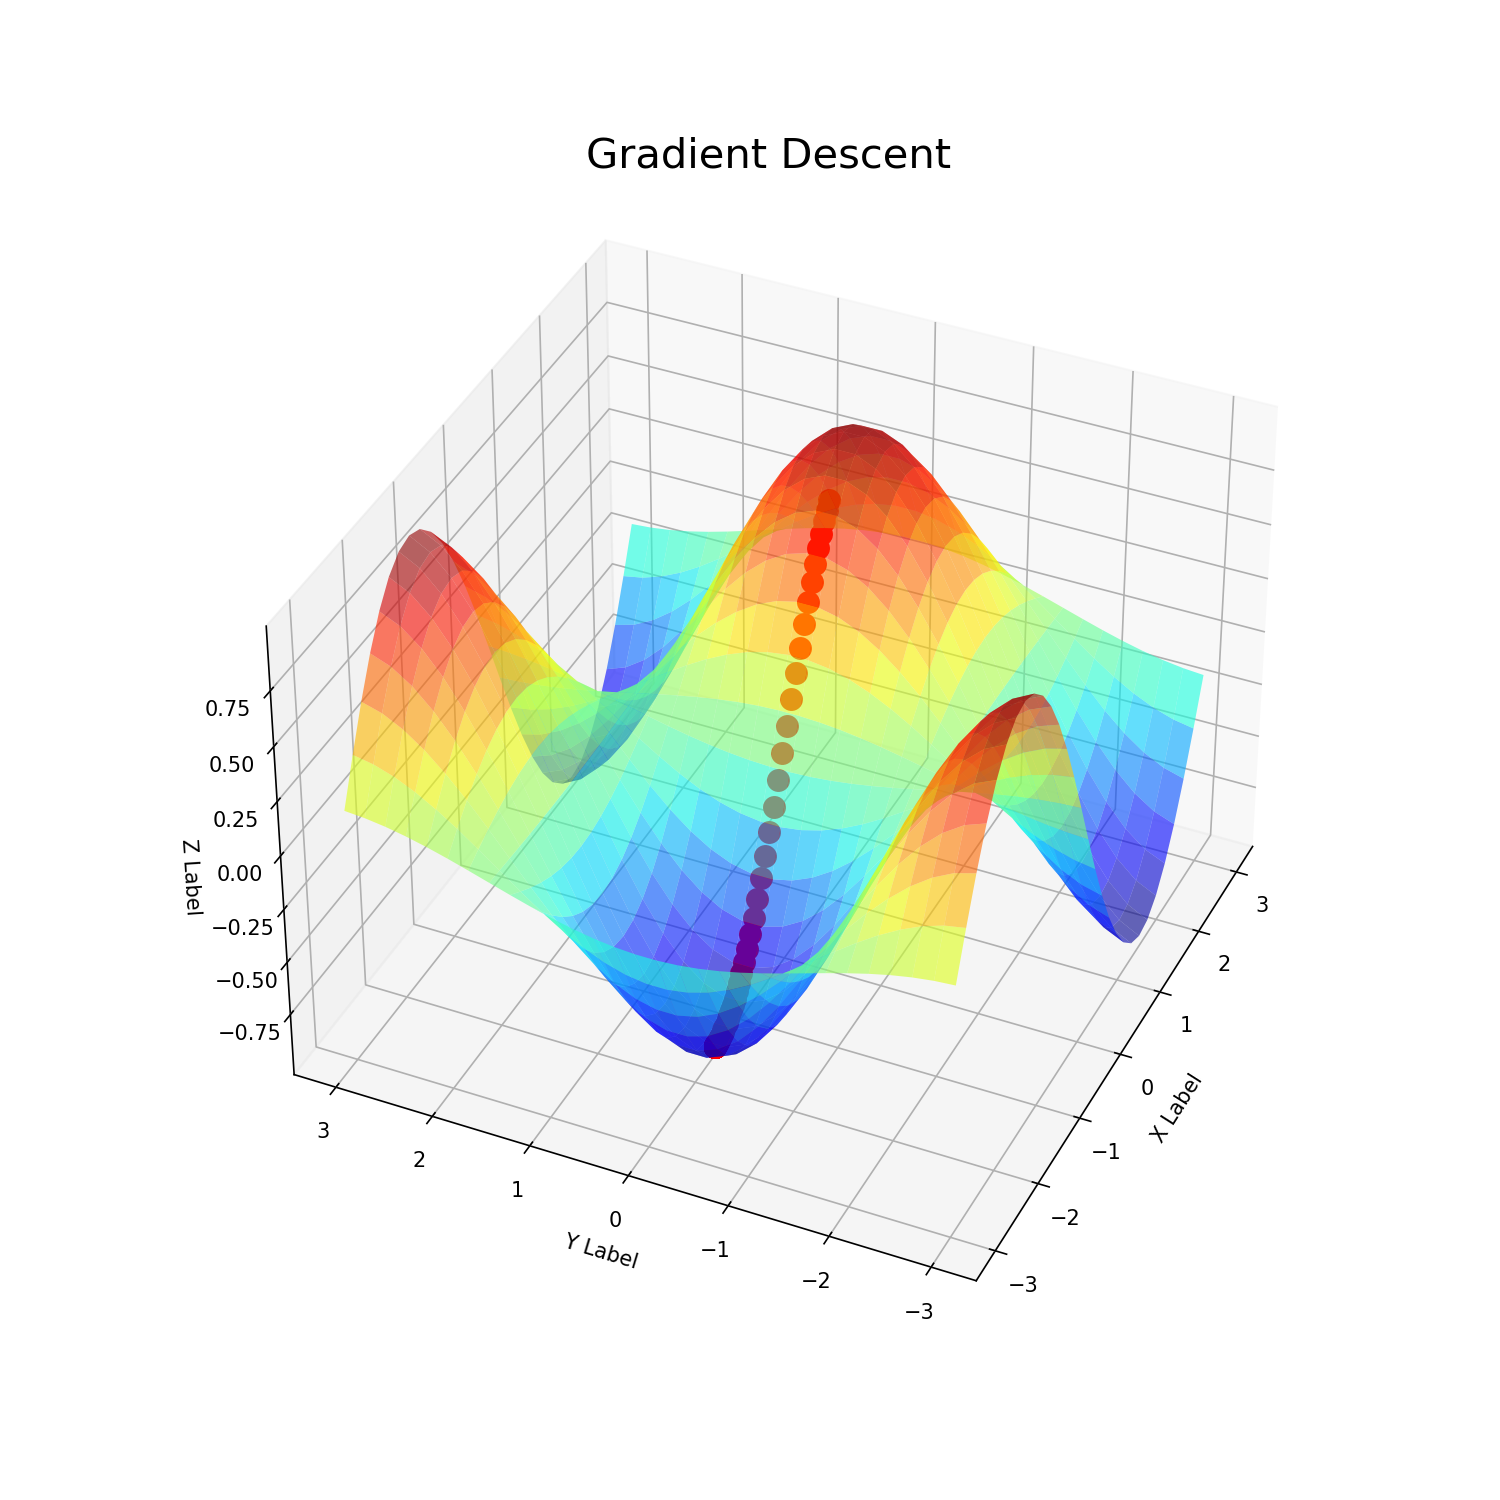

In [11]:
def visualize():
    fig = plt.figure(figsize=(10, 10))
    ax = plt.axes(projection='3d')

    ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='jet', edgecolor='none', alpha=0.6)
    ax.set_xlabel('X Label')
    ax.set_ylabel('Y Label')
    ax.set_zlabel('Z Label')
    ax.plot(xlist, ylist, zlist, 'ro', markersize=10)
    ax.set_title('Gradient Descent', fontsize=20);
visualize()

## Gradient Checking

Вы являетесь частью команды, работающей над тем, чтобы сделать мобильные платежи доступными по всему миру, и вас просят построить модель глубокого обучения для обнаружения мошенничества-всякий раз, когда кто-то делает платеж, вы хотите увидеть, может ли платеж быть мошенническим, например, если учетная запись пользователя была захвачена хакером.

Но обратное распространение довольно сложно реализовать, и иногда у него есть ошибки. Поскольку это критически важное приложение, генеральный директор вашей компании хочет быть действительно уверен, что ваша реализация обратного распространения является правильной. Ваш генеральный директор говорит: _"Дайте мне доказательство того, что ваше обратное распространение действительно работает!"_. 

По определению производной (или градиента):
$$ \frac{\partial F}{\partial w} \approx \lim_{\Delta \to 0} \frac{F(w + \Delta) - F(w - \Delta)}{2 \Delta} \tag{1}$$

Что можно было бы сделать, чтобы проверить корректность вычисления градиента функции $F$ по весам $w$:

>Запомнить $F(w)$, взять маленькое $\Delta$. 
Тогда $\frac{ F(w_1, \ldots, w_i + \Delta, \ldots, w_m) - F(w_1, \ldots, w_i - \Delta, \ldots, w_m)}{2\Delta}$ должно получиться близким к аналитическому значению частной производной по $w_i$ 


>Запомнить $F(w)$, взять маленькое $\Delta$, посчитать $F(w_1, \ldots, w_i + \Delta, \ldots, w_m)$. Тогда $\frac{F(w_1, \ldots, w_i + \Delta, \ldots, w_m) - F(w_1, \ldots, w_m)}{\Delta} $  должно получиться близким к аналитическому значению частной производной по $w_i$.

>Запомнить $F(w)$, взять маленькое $\Delta$ и посмотреть на вектор, в котором на i-м месте стоит $F(w_1, \ldots, w_i + \Delta, \ldots, w_m)$. Тогда если из этого вектора вычесть $F(w)$, а потом результат разделить на $\Delta$, то вектор, который у нас получится, должен быть близок к аналитическому значению градиента.



In [7]:
def relative_error(x, y):
    return np.max(np.abs(x - y) / (np.maximum(1e-8, np.abs(x) + np.abs(y))))

def compute_numerical_gradient(w, f, delta=1e-7):
    gradient = []
    for wi in w:
        gradient.append((f(wi + delta) -  f(wi - delta)) / (2 * delta))
    return np.array(gradient, dtype='float64')

In [8]:
def tanh_gradient(x):
    return 1 - np.tanh(x) ** 2


x = np.array([1.0, 2.1, 0.3, 0.7])

print('tanh', np.tanh(x))
print('tanh_gradient', tanh_gradient(x))
print('numerical_gradient', compute_numerical_gradient(x, f=lambda x: np.tanh(x)))

diff = relative_error(tanh_gradient(x), compute_numerical_gradient(x, f=lambda x: np.tanh(x)))
print(f'diff = {round(diff, 10)}')

tanh [0.76159416 0.97045194 0.29131261 0.60436778]
tanh_gradient [0.41997434 0.05822304 0.91513696 0.63473959]
numerical_gradient [0.41997434 0.05822304 0.91513696 0.63473959]
diff = 9e-10


# Optimization Methods

До сих пор вы всегда использовали градиентный спуск, чтобы обновить параметры и минимизировать затраты. В этой тетради вы узнаете более продвинутые методы оптимизации, которые могут ускорить процесс обучения и, возможно, даже привести вас к лучшему конечному значению функции затрат. Наличие хорошего алгоритма оптимизации может быть разницей между днями ожидания и всего лишь несколькими часами, чтобы получить хороший результат.

Градиентный спуск идет "под гору" по стоимостной функции $J$. Думайте об этом как о попытке сделать это:
<img src="https://user-images.githubusercontent.com/54672403/84380404-f4c05400-abef-11ea-9ec0-0da6419bbcdd.jpg" style="width:650px;height:300px;">
<caption><center>**Минимизация затрат подобна нахождению самой низкой точки в холмистом ландшафте** <br> на каждом этапе обучения вы обновляете свои параметры, следуя определенному направлению, чтобы попытаться добраться до самой низкой возможной точки.</center></caption>

**Обозначения**: как обычно, $\frac{\partial J}{\partial a } = $ `da` на любые переменные `a`.

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io
import math
import sklearn
import sklearn.datasets

from opt_utils import load_params_and_grads, initialize_parameters, forward_propagation, backward_propagation
from opt_utils import compute_cost, predict, predict_dec, plot_decision_boundary, load_dataset
from testCases_v4_opt import *

%matplotlib inline
plt.rcParams['figure.figsize'] = (7.0, 4.0) # plots size
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

## Gradient Descent
Простой метод оптимизации в машинном обучении-это градиентный спуск (GD). Когда вы делаете шаги градиента по отношению ко всем примерам $m$ на каждом шаге, это также называется пакетным градиентным спуском.

**Разминочное упражнение**: реализация правила обновления градиентного спуска. Правило градиентного спуска таково:
$$for \ \ l = 1, ..., L $$
$$ W^{[l]} = W^{[l]} - \alpha \text{ } dW^{[l]} \tag{1}$$
$$ b^{[l]} = b^{[l]} - \alpha \text{ } db^{[l]} \tag{2}$$

где L - количество слоев и $\alpha$ - скорость обучения. Все параметры должны храниться в словаре "parameters". Обратите внимание, что итератор `l` начинается с 0 в цикле `for`, а первые параметры - $W^{[1]}$ и $b^{[1]}$. Вам нужно переключить `l` на `l+1` при кодировании.


In [6]:
def update_parameters_with_gd(parameters, grads, learning_rate):
    """
    Обновление параметров с помощью одного шага градиентного спуска
    
    Arguments:
    parameters (dict) содержащий параметры для обновления
                    parameters['W' + str(l)] = Wl
                    parameters['b' + str(l)] = bl
    grads (dict) содержащий градиенты для обновления каждого параметра
                    grads['dW' + str(l)] = dWl
                    grads['db' + str(l)] = dbl
    learning_rate - скорость обучения, скаляр
    
    returns: parameters (dict) содержащий обновлённые параметры 
    """
    L = len(parameters) // 2 # количество слоев в нейронных сетях

    for l in range(L):
        parameters["W" + str(l+1)] = parameters["W" + str(l+1)] - learning_rate * grads["dW" + str(l+1)]
        parameters["b" + str(l+1)] = parameters["b" + str(l+1)] - learning_rate * grads["db" + str(l+1)]
    return parameters

In [7]:
parameters, grads, learning_rate = update_parameters_with_gd_test_case()

parameters = update_parameters_with_gd(parameters, grads, learning_rate)
print("\nW1 = \n", parameters["W1"])
print("\nb1 = ",* parameters["b1"])
print("\nW2 = \n", parameters["W2"])
print("\nb2 = \n", parameters["b2"])


W1 = 
 [[ 1.63535156 -0.62320365 -0.53718766]
 [-1.07799357  0.85639907 -2.29470142]]

b1 =  [1.74604067] [-0.75184921]

W2 = 
 [[ 0.32171798 -0.25467393  1.46902454]
 [-2.05617317 -0.31554548 -0.3756023 ]
 [ 1.1404819  -1.09976462 -0.1612551 ]]

b2 = 
 [[-0.88020257]
 [ 0.02561572]
 [ 0.57539477]]


Ещё одним вариантов является Stochastic Gradient Descent (SGD), который эквивалентен мини-пакетному градиентному спуску, где каждая мини-партия имеет только 1 пример. Правило обновления, которое вы только что внедрили, не изменяется. Что изменится, так это то, что вы будете вычислять градиенты только на одном обучающем примере за один раз, а не на всем обучающем наборе. Приведенные ниже примеры кода иллюстрируют разницу между стохастическим градиентным спуском и (пакетным) градиентным спуском.


- **(Batch) Gradient Descent**:

``` python
X = data_input
Y = labels
parameters = initialize_parameters(layers_dims)
for i in range(0, num_iterations):
    # Forward propagation
    a, caches = forward_propagation(X, parameters)
    # Compute cost.
    cost = compute_cost(a, Y)
    # Backward propagation.
    grads = backward_propagation(a, caches, parameters)
    # Update parameters.
    parameters = update_parameters(parameters, grads)
        
```

- **Stochastic Gradient Descent**:

```python
X = data_input
Y = labels
parameters = initialize_parameters(layers_dims)
for i in range(0, num_iterations):
    for j in range(0, m):
        # Forward propagation
        a, caches = forward_propagation(X[:,j], parameters)
        # Compute cost
        cost = compute_cost(a, Y[:,j])
        # Backward propagation
        grads = backward_propagation(a, caches, parameters)
        # Update parameters.
        parameters = update_parameters(parameters, grads)
```


В стохастическом градиентном спуске перед обновлением градиентов используется только 1 обучающий пример. Когда тренировочный набор Большой, SGD может быть быстрее. Но параметры будут "колебаться" к минимуму, а не сходиться плавно. Вот иллюстрация этого:

<img src="https://user-images.githubusercontent.com/54672403/84380417-f8ec7180-abef-11ea-8e55-855eb9cbaf8e.png" style="width:750px;height:250px;">
<caption><center> <font color='purple'> **SGD vs GD**<br> "+" обозначает минимум затрат. SGD приводит ко многим колебаниям, чтобы достичь сходимости. Но каждый шаг намного быстрее вычисляется для SGD, чем для GD, так как он использует только один обучающий пример (против всего пакета для> GD)</font></center></caption>

**Обратите внимание** также, что для реализации SGD требуется всего 3 цикла for:
1. По количеству итераций
2. По обучаюим примерам $m$
3. По слоям (для обновления всех параметров, от $(W^{[1]}, b^{[1]})$ до $(W^{[L]}, b^{[L]})$)

На практике вы часто будете получать более быстрые результаты, если не будете использовать ни весь обучающий набор, ни только один обучающий пример для выполнения каждого обновления. Мини-пакетный градиентный спуск использует промежуточное число примеров для каждого шага. С помощью мини-пакетного градиентного спуска вы зацикливаетесь на мини-пакетах вместо того, чтобы зацикливаться на отдельных учебных примерах.

<img src="https://user-images.githubusercontent.com/54672403/84380414-f722ae00-abef-11ea-9ea8-14ac7bee0348.png" style="width:750px;height:250px;">
<caption><center> <font color='purple'> **SGD vs Mini-Batch GD**<br> "+" обозначает минимум затрат. Использование мини-пакетов в вашем алгоритме оптимизации часто приводит к более быстрой оптимизации </font></center></caption>

<font color='blue'>
**Что вы должны помнить**:
- Разница между градиентным спуском, мини-пакетным градиентным спуском и стохастическим градиентным спуском заключается в количестве примеров, которые вы используете для выполнения одного шага обновления.
- Вы должны настроить скорость обучения - гиперпараметр $\alpha$.
- При хорошо отточенном размере мини-пакета он обычно превосходит либо градиентный спуск, либо стохастический градиентный спуск (особенно когда обучающий набор Большой).
    

##  Mini-Batch Gradient descent

Давайте научимся строить мини-пакеты из обучающего набора (X, Y).

Есть два шага:
- **Shuffle**: создайте перетасованную версию тренировочного набора (X, Y), как показано ниже. Каждый столбец X и Y представляет собой обучающий пример. Обратите внимание, что случайная перетасовка выполняется синхронно между X и Y. таким образом, после перетасовки столбец $i^{th}$ X является примером, соответствующим метке $i^{th}$ в Y. шаг перетасовки гарантирует, что примеры будут случайным образом разбиты на различные мини-пакеты.

<img src="https://user-images.githubusercontent.com/54672403/84380419-f9850800-abef-11ea-9491-34d20fb36f6b.png" style="width:550px;height:300px;">

- **Partition**: Partition перетасовываются (X, Y) в мини-пакеты размера `mini_batch_size` (здесь 64). Обратите внимание, что количество обучающих примеров не всегда делится на `mini_batch_size`. Последний мини-пакет может быть меньше, но вам не нужно беспокоиться об этом. Когда конечный мини-пакет будет меньше полного "mini_batch_size", он будет выглядеть следующим образом:

<img src="https://user-images.githubusercontent.com/54672403/84380415-f7bb4480-abef-11ea-9021-448455ad5d74.png" style="width:550px;height:300px;">

**Упражнение**: реализуйте `random_mini_batches`. Мы закодили часть перетасовки для вас. Чтобы помочь вам с partitioning, мы даем вам следующий код, который выбирает индексы для мини-пакетов $1^{st}$ и $2^{nd}$ :

```python
first_mini_batch_X = shuffled_X[:, 0 : mini_batch_size]
second_mini_batch_X = shuffled_X[:, mini_batch_size : 2 * mini_batch_size]
...
```
Обратите внимание, что последний мини-пакет может оказаться меньше, чем `mini_batch_size=64`. Пусть $\lfloor s \rfloor$ представляет собой $s$, округленное до ближайшего целого числа (это `math.floor(s)`). Если общее количество примеров не кратно `mini_batch_size=64`, то будет $\lfloor \frac{m}{mini\_batch\_size}\rfloor$ mini-пакетов с полными 64 примерами, а количество примеров в конечном мини-пакете (не полном) будет равно ($m-mini_\_batch_\_size \times \lfloor \frac{m}{mini\_batch\_size}\rfloor$).

In [8]:
def random_mini_batches(X, Y, mini_batch_size = 64, seed = 0):
    """
    Создает список случайных мини-пакетов из (X, Y)
    
    X -- обучающий набор, shape (input size, number of examples)
    Y -- метки классов {1- blue dot / 0 -red dot}, shape (1, number of examples)
    mini_batch_size (int) -- размер мини-пакета
    
    returns:mini_batches (list) из синхронных (mini_batch_X, mini_batch_Y)
    """
    
    np.random.seed(seed)
    m = X.shape[1]  # количество обучающих примеров
    mini_batches = []
        
    ## Step 1: Shuffle (X, Y)
    permutation = list(np.random.permutation(m))
    shuffled_X = X[:, permutation]    
    shuffled_Y = Y[:, permutation].reshape((1,m))
    ## Step 2: Partition (shuffled_X, shuffled_Y)
    num_complete_minibatches = math.floor(m/mini_batch_size)# количество мини-пакетов размера mini_batch_size в  partitionning
    for k in range(0, num_complete_minibatches):
        mini_batch_X = shuffled_X[:, k * mini_batch_size : (k+1) * mini_batch_size]
        mini_batch_Y = shuffled_Y[:, k * mini_batch_size : (k+1) * mini_batch_size]
        mini_batch = (mini_batch_X, mini_batch_Y)
        mini_batches.append(mini_batch)
    
    # Обработка конечного мини-пакета (last mini-batch < mini_batch_size)
    if m % mini_batch_size != 0:
        mini_batch_X = shuffled_X[:, mini_batch_size * num_complete_minibatches : m]
        mini_batch_Y = shuffled_Y[:, mini_batch_size * num_complete_minibatches : m]
        mini_batch = (mini_batch_X, mini_batch_Y)
        mini_batches.append(mini_batch)
    return mini_batches

In [9]:
X_assess, Y_assess, mini_batch_size = random_mini_batches_test_case()
mini_batches = random_mini_batches(X_assess, Y_assess, mini_batch_size)

print ("shape 1st mini_batch_X: " , mini_batches[0][0].shape)
print ("shape 2nd mini_batch_X: " , mini_batches[1][0].shape)
print ("shape 3rd mini_batch_X: " , mini_batches[2][0].shape)
print ("\nshape 1st mini_batch_Y: " , mini_batches[0][1].shape)
print ("shape 2nd mini_batch_Y: " , mini_batches[1][1].shape)
print ("shape 3rd mini_batch_Y: " , mini_batches[2][1].shape)
print ("\nmini batch sanity check: ", mini_batches[0][0][0][0:3])

shape 1st mini_batch_X:  (12288, 64)
shape 2nd mini_batch_X:  (12288, 64)
shape 3rd mini_batch_X:  (12288, 20)

shape 1st mini_batch_Y:  (1, 64)
shape 2nd mini_batch_Y:  (1, 64)
shape 3rd mini_batch_Y:  (1, 20)

mini batch sanity check:  [ 0.90085595 -0.7612069   0.2344157 ]


<font color='blue'>
**Что вы должны помнить**:
- Перетасовка и Partitioning - это два шага, необходимые для создания мини-пакетов
- Степени двойки часто выбираются в качестве размера мини-пакета, например, 16, 32, 64, 128.

## Momentum

<img src="https://user-images.githubusercontent.com/54672403/84380421-fa1d9e80-abef-11ea-8536-397f7583a396.png" style="width:400px;height:350px;">

Поскольку мини-пакетный градиентный спуск делает обновление параметров после просмотра только подмножества примеров, направление обновления имеет некоторую дисперсию, и поэтому путь, пройденный мини-пакетным градиентным спуском, будет "колебаться" в сторону сходимости. Использование импульса (momentum) может уменьшить эти колебания.

Momentum учитывает прошлые градиенты, чтобы сгладить обновление. Мы будем хранить "направление" предыдущих градиентов в переменной $v$. Формально это будет экспоненциально взвешенное среднее значение градиента на предыдущих шагах. Вы также можете думать о $v$ как о "скорости" шара, катящегося вниз по склону, наращивая скорость (и импульс) в соответствии с направлением градиента / уклона холма.


<img src="https://user-images.githubusercontent.com/54672403/84380839-b8412800-abf0-11ea-9983-69277c32be3e.png" style="width:400px;height:250px;">
<caption><center> <font color='purple'>Красные стрелки показывают направление, взятое одним шагом мини-пакетного градиентного спуска с импульсом. Синие точки показывают направление градиента (относительно текущего мини-пакета) на каждом шаге. Вместо того чтобы просто следовать градиенту, мы позволяем градиенту влиять на $v$, а затем делаем шаг в направлении $v$.<br> </font></center><caption>
    
**Упражнение**: инициализируйте скорость. Скорость, $v$, - это словарь, который должен быть инициализирован массивами нулей. Его ключи такие же, как и в словаре `grads`, то есть:
для $l =1,...,L$:

```python
v["dW" + str(l+1)] = ... #(numpy array of zeros with the same shape as parameters["W" + str(l+1)])
v["db" + str(l+1)] = ... #(numpy array of zeros with the same shape as parameters["b" + str(l+1)])
```

In [10]:
def initialize_velocity(parameters):
    """
    Инициализирует скорость как словарь python с помощью:
                - keys: "dW1", "db1", ..., "dWL", "dbL" 
                - values: numpy массив нулей той же формы, что и соответствующие градиенты / параметры.
    
    parameters (dict) содержащий параметры.
                    parameters['W' + str(l)] = Wl
                    parameters['b' + str(l)] = bl
    
    returns: v (dict) содержащий текущую скорость.
                    v['dW' + str(l)] = скорость движения dWl
                    v['db' + str(l)] = скорость движения dbl
    """
    
    L = len(parameters) // 2 # количество слоев в сети
    v = {}
    
    # Init velocity
    for l in range(L):
        v["dW" + str(l+1)] = np.zeros(parameters["W" + str(l+1)].shape)
        v["db" + str(l+1)] = np.zeros(parameters["b" + str(l+1)].shape)
    return v

In [11]:
parameters = initialize_velocity_test_case()

v = initialize_velocity(parameters)
print("v['dW1'] = ", *v["dW1"])
print("v['db1'] = ", *v["db1"])
print("v['dW2'] = ", *v["dW2"])
print("v['db2'] = ", *v["db2"])

v['dW1'] =  [0. 0. 0.] [0. 0. 0.]
v['db1'] =  [0.] [0.]
v['dW2'] =  [0. 0. 0.] [0. 0. 0.] [0. 0. 0.]
v['db2'] =  [0.] [0.] [0.]


**Упражнение**: теперь выполните обновление параметров с помощью импульса. Правило обновления импульса таково, что для $l = 1, ..., L$: 

$$ \begin{cases}
v_{dW^{[l]}} = \beta v_{dW^{[l]}} + (1 - \beta) dW^{[l]} \\
W^{[l]} = W^{[l]} - \alpha v_{dW^{[l]}}
\end{cases}\tag{3}$$

$$\begin{cases}
v_{db^{[l]}} = \beta v_{db^{[l]}} + (1 - \beta) db^{[l]} \\
b^{[l]} = b^{[l]} - \alpha v_{db^{[l]}} 
\end{cases}\tag{4}$$

где L-количество слоев, $\beta$ - импульс,  $\alpha$ - скорость обучения. Все параметры должны храниться в словаре `parameters`.

In [12]:
def update_parameters_with_momentum(parameters, grads, v, beta, learning_rate):
    """
    Обновление параметров с помощью импульса
    
    parameters (dict) содержащий параметры.
                    parameters['W' + str(l)] = Wl
                    parameters['b' + str(l)] = bl
    grads (dict) содержит ваши градиенты для каждого параметра
                    grads['dW' + str(l)] = dWl
                    grads['db' + str(l)] = dbl
    v (dict) содержащий текущую скорость.
                    v['dW' + str(l)] = ...
                    v['db' + str(l)] = ...
    beta -- гиперпараметр импульса, скаляр
    learning_rate -- скорость обучения, скаляр
    
    returns:
      parameters (dict) содержащий обновлённые параметры.
      v (dict) содержащий обновленные скорости
    """
    L = len(parameters) // 2 # количество слоев в сети
    
    # Momentum update для каждого параметра
    for l in range(L):
        ## velocities
        v["dW" + str(l+1)] = beta * v["dW" + str(l+1)] + (1. - beta) * grads["dW" + str(l+1)]
        v["db" + str(l+1)] = beta * v["db" + str(l+1)] + (1. - beta) * grads["db" + str(l+1)]
        ## update parameters
        parameters["W" + str(l+1)] = parameters["W" + str(l+1)] - learning_rate * v["dW" + str(l+1)]
        parameters["b" + str(l+1)] = parameters["b" + str(l+1)] - learning_rate * v["db" + str(l+1)]
    return parameters, v

In [13]:
parameters, grads, v = update_parameters_with_momentum_test_case()

parameters, v = update_parameters_with_momentum(parameters, grads, v, beta = 0.9, learning_rate = 0.01)
print("W1 = \n", parameters["W1"])
print("b1 = \n", parameters["b1"])
print("W2 = \n", parameters["W2"])
print("b2 = \n", parameters["b2"])
print("\nv[\"dW1\"] = \n", v["dW1"])
print("\nv[\"db1\"] = \n", v["db1"])
print("\nv[\"dW2\"] = \n", v["dW2"])
print("\nv[\"db2\"] = \n", v["db2"])

W1 = 
 [[ 1.62544598 -0.61290114 -0.52907334]
 [-1.07347112  0.86450677 -2.30085497]]
b1 = 
 [[ 1.74493465]
 [-0.76027113]]
W2 = 
 [[ 0.31930698 -0.24990073  1.4627996 ]
 [-2.05974396 -0.32173003 -0.38320915]
 [ 1.13444069 -1.0998786  -0.1713109 ]]
b2 = 
 [[-0.87809283]
 [ 0.04055394]
 [ 0.58207317]]

v["dW1"] = 
 [[-0.11006192  0.11447237  0.09015907]
 [ 0.05024943  0.09008559 -0.06837279]]

v["db1"] = 
 [[-0.01228902]
 [-0.09357694]]

v["dW2"] = 
 [[-0.02678881  0.05303555 -0.06916608]
 [-0.03967535 -0.06871727 -0.08452056]
 [-0.06712461 -0.00126646 -0.11173103]]

v["db2"] = 
 [[0.02344157]
 [0.16598022]
 [0.07420442]]


**Выводы **
- Скорость инициализируется нулями. Таким образом, алгоритм займет несколько итераций, чтобы "нарастить" скорость и начать делать большие шаги.
- Если $\beta = 0$, то это просто становится стандартным градиентным спуском без импульса.


**Как выбирать $\beta$?**
- Чем больше импульс $\beta$, тем плавнее обновление, потому что тем больше мы учитываем прошлые градиенты. Но если $\beta$ слишком велик,он также может слишком сильно сгладить обновления.
- Обычно значения для $\beta$ варьируются от 0,8 до 0,999. Если вы не чувствуете склонности настраивать это, то $\beta = 0.9$ часто является разумным значением по умолчанию.
- Для настройки оптимального $\beta$ для вашей модели может потребоваться попробовать несколько значений, чтобы увидеть, что работает лучше всего с точки зрения уменьшения значения функции затрат $J$.

<font color='blue'>
**Что вы должны помнить**:
- Импульс учитывает прошлые градиенты, чтобы сгладить шаги градиентного спуска. Он может быть применен с помощью пакетного градиентного спуска, мини-пакетного градиентного спуска или стохастического градиентного спуска.
- Вы должны настроить гиперпараметр импульса $\beta$ и скорость обучения $\alpha$.

##  Adam

Adam - один из самых эффективных алгоритмов оптимизации для обучения нейронных сетей. Он сочетает в себе идеи из RMSProp и Momentum.

**Как работает Adam?**
1. Он вычисляет экспоненциально взвешенное среднее прошлых градиентов и сохраняет его в переменных $v$ (до коррекции смещения) и $v^{corrected}$ (после коррекцией смещения).
2. Он вычисляет экспоненциально взвешенное среднее квадратов прошлых градиентов и сохраняет его в переменных $s$ (до коррекции смещения) и $s^{corrected}$ (после коррекцией смещения).
3. Он обновляет параметры в направлении, основанном на объединении информации из "1" и "2".


Правило обновления таково: for $l = 1, ..., L$: 

$$\begin{cases}
v_{dW^{[l]}} = \beta_1 v_{dW^{[l]}} + (1 - \beta_1) \frac{\partial \mathcal{J} }{ \partial W^{[l]} } \\
v^{corrected}_{dW^{[l]}} = \frac{v_{dW^{[l]}}}{1 - (\beta_1)^t} \\
s_{dW^{[l]}} = \beta_2 s_{dW^{[l]}} + (1 - \beta_2) (\frac{\partial \mathcal{J} }{\partial W^{[l]} })^2 \\
s^{corrected}_{dW^{[l]}} = \frac{s_{dW^{[l]}}}{1 - (\beta_1)^t} \\
W^{[l]} = W^{[l]} - \alpha \frac{v^{corrected}_{dW^{[l]}}}{\sqrt{s^{corrected}_{dW^{[l]}}} + \varepsilon}
\end{cases}$$
где:
- t подсчитывает количество шагов, предпринятых Адамом
- L - количество слоев
- $\beta_1$ и $\beta_2$ - это гиперпараметры, управляющие двумя экспоненциально взвешенными средними.
- $\alpha$ - это скорость обучения
- $\varepsilon$ - это очень маленькое число, чтобы избежать деления на ноль
 

**Упражнение**: инициализируйте переменные Adam $v, s$, которые отслеживают прошлую информацию.

**Инструкция**: переменные $v, s$ - это словари, которые должны быть инициализированы массивами нулей. Их ключи такие же, как и для `grads`, то есть:

for $l = 1, ..., L$:
```python
v["dW" + str(l+1)] = ... #(numpy array of zeros with the same shape as parameters["W" + str(l+1)])
v["db" + str(l+1)] = ... #(numpy array of zeros with the same shape as parameters["b" + str(l+1)])
s["dW" + str(l+1)] = ... #(numpy array of zeros with the same shape as parameters["W" + str(l+1)])
s["db" + str(l+1)] = ... #(numpy array of zeros with the same shape as parameters["b" + str(l+1)])

```

In [14]:
def initialize_adam(parameters) :
    """
    Инициализирует v и s как два словаря:
        - keys:   "dW1", "db1", ..., "dWL", "dbL" 
        - values: numpy массив нулей той же формы, что и соответствующие градиенты/параметры.
    
     parameters (dict) содержащий параметры.
                    parameters["W" + str(l)] = Wl
                    parameters["b" + str(l)] = bl
    
    returns: 
      v (dict) содержит экспоненциально взвешенное среднее значение градиента.
                    v["dW" + str(l)] = ...
                    v["db" + str(l)] = ...
      s (dict) содержит экспоненциально взвешенное среднее квадратического градиента.
                    s["dW" + str(l)] = ...
                    s["db" + str(l)] = ...

    """
    
    L = len(parameters) // 2  # количество слоев в сети
    v = {}
    s = {}
    
    # Init v, s. Input: "parameters". Outputs: "v, s".
    for l in range(L):
        v["dW" + str(l+1)] = np.zeros(parameters["W" + str(l+1)].shape)
        v["db" + str(l+1)] = np.zeros(parameters["b" + str(l+1)].shape)
        s["dW" + str(l+1)] = np.zeros(parameters["W" + str(l+1)].shape)
        s["db" + str(l+1)] = np.zeros(parameters["b" + str(l+1)].shape)
    return v, s

In [15]:
parameters = initialize_adam_test_case()

v, s = initialize_adam(parameters)
print("\nv['dW1'] =\n", v["dW1"])
print("\nv['db1'] =", *v["db1"])
print("\nv['dW2'] =\n", v["dW2"])
print("\nv['db2'] =",*v["db2"])
print("\n\ns['dW1'] =\n", s["dW1"])
print("\ns['db1'] =", *s["db1"])
print("\ns['dW2'] =\n", s["dW2"])
print("\ns['db2'] =",*s["db2"])



v['dW1'] =
 [[0. 0. 0.]
 [0. 0. 0.]]

v['db1'] = [0.] [0.]

v['dW2'] =
 [[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]

v['db2'] = [0.] [0.] [0.]


s['dW1'] =
 [[0. 0. 0.]
 [0. 0. 0.]]

s['db1'] = [0.] [0.]

s['dW2'] =
 [[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]

s['db2'] = [0.] [0.] [0.]


**Упражнение**: теперь выполните обновление параметров с помощью Adam. Напомним, общее правило обновления:
for $l = 1, ..., L$: 

$$\begin{cases}
v_{W^{[l]}} = \beta_1 v_{W^{[l]}} + (1 - \beta_1) \frac{\partial J }{ \partial W^{[l]} } \\
v^{corrected}_{W^{[l]}} = \frac{v_{W^{[l]}}}{1 - (\beta_1)^t} \\
s_{W^{[l]}} = \beta_2 s_{W^{[l]}} + (1 - \beta_2) (\frac{\partial J }{\partial W^{[l]} })^2 \\
s^{corrected}_{W^{[l]}} = \frac{s_{W^{[l]}}}{1 - (\beta_2)^t} \\
W^{[l]} = W^{[l]} - \alpha \frac{v^{corrected}_{W^{[l]}}}{\sqrt{s^{corrected}_{W^{[l]}}}+\varepsilon}
\end{cases}$$

In [16]:
def update_parameters_with_adam(parameters, grads, v, s, t, learning_rate = 0.01,
                                beta1 = 0.9, beta2 = 0.999,  epsilon = 1e-8):
    """
    Обновляет параметры с помощью Adam
    
    
    parameters (dict) содержащий параметры для обновления
                    parameters['W' + str(l)] = Wl
                    parameters['b' + str(l)] = bl
    grads (dict) содержащий градиенты для обновления каждого параметра
                    grads['dW' + str(l)] = dWl
                    grads['db' + str(l)] = dbl
    v (dict) - Adam variable, скользящее среднее первого градиента
    s (dict) - Adam variable, скользящее среднее квадратичного градиента
    learning_rate - скорость обучения, скаляр
    beta1 -- Экспоненциальный гиперпараметр затухания для оценок прошлых градиентов
    beta2 -- Экспоненциальный гиперпараметр затухания для оценок прошлых квадратичных градиентов
    epsilon -- гиперпараметр, предотвращающий деление на ноль в обновлениях Adam

    returns:
      parameters (dict) - содержащий обновленные параметры
      v (dict) - Adam variable, скользящее среднее первого градиента
      s (dict) - Adam variable, скользящее среднее квадратичного градиента
    """
    
    L = len(parameters) // 2    # количество слоев в нейронных сетях
    v_corrected = {}            # (dict) Init first moment estimate
    s_corrected = {}            # (dict) Init second moment estimate
    
    # update all parameters
    for l in range(L):
        ''' 
        Moving average of the gradients. 
          Inputs: "v, grads, beta1"
          Output: "v"
        '''
        v["dW" + str(l+1)] = beta1 * v["dW" + str(l+1)] + (1. - beta1) * grads["dW" + str(l+1)]
        v["db" + str(l+1)] = beta1 * v["db" + str(l+1)] + (1. - beta1) * grads["db" + str(l+1)]
        '''
        Compute bias-corrected first moment estimate
          Inputs: "v, beta1, t" 
          Output: "v_corrected"
        '''
        v_corrected["dW" + str(l+1)] = v["dW" + str(l+1)] / (1 - beta1**t)
        v_corrected["db" + str(l+1)] = v["db" + str(l+1)] / (1 - beta1**t)

        '''
        Moving average of the squared gradients. 
          Inputs: "s, grads, beta2"
          Output: "s".
        '''
        s["dW" + str(l+1)] = beta2 * s["dW" + str(l+1)] + (1. - beta2) * grads["dW" + str(l+1)]**2
        s["db" + str(l+1)] = beta2 * s["db" + str(l+1)] + (1. - beta2) * grads["db" + str(l+1)]**2

        '''
        Compute bias-corrected second raw moment estimate. 
          Inputs: "s, beta2, t"
          Output: "s_corrected"
        '''
        s_corrected["dW" + str(l+1)] = s["dW" + str(l+1)] / (1 - beta2**t)
        s_corrected["db" + str(l+1)] = s["db" + str(l+1)] / (1 - beta2**t)

        '''
        Update parameters. 
          Inputs: "parameters, learning_rate, v_corrected, s_corrected, epsilon".
          Output: "parameters".
        '''
        parameters["W" + str(l+1)] = parameters["W" + str(l+1)] - learning_rate * v_corrected["dW" + str(l+1)] / \
                                    (np.sqrt(s_corrected["dW" + str(l+1)]) + epsilon)
        parameters["b" + str(l+1)] = parameters["b" + str(l+1)] - learning_rate * v_corrected["db" + str(l+1)] / \
                                    (np.sqrt(s_corrected["db" + str(l+1)]) + epsilon)
    return parameters, v, s

In [17]:
parameters, grads, v, s = update_parameters_with_adam_test_case()
parameters, v, s  = update_parameters_with_adam(parameters, grads, v, s, t = 2)

print("W1 = \n", parameters["W1"])
print("b1 = ", *parameters["b1"])
print("W2 = \n", parameters["W2"])
print("b2 = ", *parameters["b2"])
print("\n\nv[\"dW1\"] = \n", v["dW1"])
print("v[\"db1\"] = ", *v["db1"])
print("v[\"dW2\"] = \n", v["dW2"])
print("\nv['db2'] =", *v["db2"])
print("\n\n s['dW1'] =\n", s["dW1"])
print("\n s['db1'] =\n", s["db1"])
print("\n s['dW2'] =\n", s["dW2"])
print("\n s['db2'] =\n", s["db2"])

W1 = 
 [[ 1.63178673 -0.61919778 -0.53561312]
 [-1.08040999  0.85796626 -2.29409733]]
b1 =  [1.75225313] [-0.75376553]
W2 = 
 [[ 0.32648046 -0.25681174  1.46954931]
 [-2.05269934 -0.31497584 -0.37661299]
 [ 1.14121081 -1.09244991 -0.16498684]]
b2 =  [-0.88529979] [0.03477238] [0.57537385]


v["dW1"] = 
 [[-0.11006192  0.11447237  0.09015907]
 [ 0.05024943  0.09008559 -0.06837279]]
v["db1"] =  [-0.01228902] [-0.09357694]
v["dW2"] = 
 [[-0.02678881  0.05303555 -0.06916608]
 [-0.03967535 -0.06871727 -0.08452056]
 [-0.06712461 -0.00126646 -0.11173103]]

v['db2'] = [0.02344157] [0.16598022] [0.07420442]


 s['dW1'] =
 [[0.00121136 0.00131039 0.00081287]
 [0.0002525  0.00081154 0.00046748]]

 s['db1'] =
 [[1.51020075e-05]
 [8.75664434e-04]]

 s['dW2'] =
 [[7.17640232e-05 2.81276921e-04 4.78394595e-04]
 [1.57413361e-04 4.72206320e-04 7.14372576e-04]
 [4.50571368e-04 1.60392066e-07 1.24838242e-03]]

 s['db2'] =
 [[5.49507194e-05]
 [2.75494327e-03]
 [5.50629536e-04]]


Теперь у вас есть три работающих алгоритма оптимизации (мини-пакетный градиентный спуск, импульс, Адам). Давайте реализуем модель с каждым из этих оптимизаторов и рассмотрим разницу.

##  Model with different optimization algorithms

Давайте используем следующий набор данных "Лунa" для тестирования различных методов оптимизации. (Набор данных называется "Лунa", потому что данные из каждого из двух классов выглядят немного как Луна в форме полумесяца.)

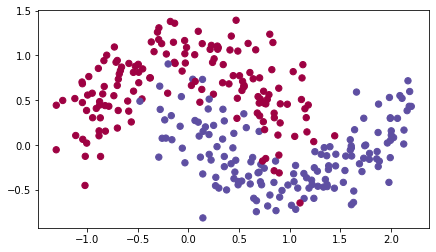

In [18]:
train_X, train_Y = load_dataset()

Мы уже внедрили 3-слойную нейронную сеть. Вы будете тренировать её с помощью:
- Мини-пакетный **градиентный спуск**: 
    - 'update_parameters_with_gd()`
- Мини-пакетный  **импульс**:
    - `initialize_velocity() update_parameters_with_momentum()`
- Мини-пакетный **Адам**:
    - `initialize_adam() и update_parameters_with_adam()`


In [19]:
def model(X, Y, layers_dims, optimizer, learning_rate = 0.0007, mini_batch_size = 64, beta = 0.9,
          beta1 = 0.9, beta2 = 0.999,  epsilon = 1e-8, num_epochs = 10000, print_cost = True):
    """
    3-слойная нейросетевая модель, которая может быть запущена в различных режимах оптимизации
    
    X - входной набор данных, shape (2, number of examples)
    Y -- метки классов {1- blue dot / 0 -red dot}, shape (1, number of examples)
    layers_dims - (list) содержащий размер каждого слоя
    learning_rate - скорость обучения, скаляр
    mini_batch_size -- размер мини-пакета
    beta -- Гиперпараметр импульса
    beta1 -- Экспоненциальный гиперпараметр затухания для оценок прошлых градиентов
    beta2 -- Экспоненциальный гиперпараметр затухания для оценок прошлых квадратичных градиентов
    epsilon -- гиперпараметр, предотвращающий деление на ноль в обновлениях Adam
    num_epochs -- количество эпох
    print_cost -- (bool) печатает стоимость каждого 1000 эпох
    
    Returns: parameters (dict) содержащий обновленные параметры
    """
    
      
    L = len(layers_dims)        # количество слоев в нейронных сетях
    costs = []                  # чтобы следить за стоимостью
    t = 0                       # инициализация счетчика, необходимого для обновления Adam
    seed = 10                        
    
    ## Init parameters
    parameters = initialize_parameters(layers_dims)
    
    ## Init optimizer
    if optimizer == "gd":
        pass # для градиентного спуска инициализация не требуется
    elif optimizer == "momentum":
        v = initialize_velocity(parameters)
    elif optimizer == "adam":
        v, s = initialize_adam(parameters)
    
    ### Optimization
    for i in range(num_epochs):
        seed = seed + 1
        minibatches = random_mini_batches(X, Y, mini_batch_size, seed)

        for minibatch in minibatches:
            # Select minibatch
            (minibatch_X, minibatch_Y) = minibatch

            # Forward propagation
            a3, caches = forward_propagation(minibatch_X, parameters)

            # compute cost
            #print("mini Batch Y shape", minibatch_Y.shape)
            cost = compute_cost(a3, minibatch_Y)

            # Backward propagation
            grads = backward_propagation(minibatch_X, minibatch_Y, caches)

            # Update parameters
            if optimizer == "gd":
                parameters = update_parameters_with_gd(parameters, grads, learning_rate)
            elif optimizer == "momentum":
                parameters, v = update_parameters_with_momentum(parameters, grads, v, beta, learning_rate)
            elif optimizer == "adam":
                t = t + 1 # Adam counter
                parameters, v, s = update_parameters_with_adam(parameters, grads, v, s,
                                                               t, learning_rate, beta1, beta2,  epsilon)
        if print_cost and i % 1000 == 0:
            print(f"Cost after epoch {i} {cost:.4}")
        if print_cost and i % 100 == 0:
            costs.append(cost)
                
    ## plot cost
    plt.plot(costs)
    plt.ylabel('cost')
    plt.xlabel('epochs (per 100)')
    plt.title("Learning rate = " + str(learning_rate))
    plt.show()
    return parameters

###  Mini-batch Gradient descent

Cost after epoch 0 0.6907
Cost after epoch 1000 0.6853
Cost after epoch 2000 0.6471
Cost after epoch 3000 0.6195
Cost after epoch 4000 0.5766
Cost after epoch 5000 0.6072
Cost after epoch 6000 0.5294
Cost after epoch 7000 0.4608
Cost after epoch 8000 0.4656
Cost after epoch 9000 0.4645


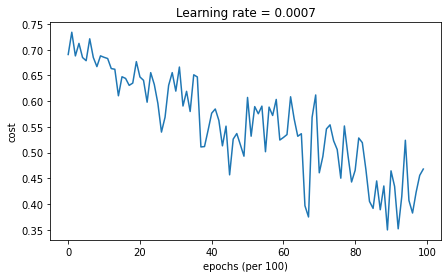

Accuracy: 79.67%


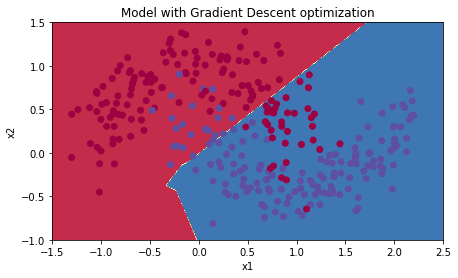

In [20]:
# train 3-layer model
layers_dims = [train_X.shape[0], 5, 2, 1]
parameters = model(train_X, train_Y, layers_dims, optimizer = "gd")

# Predict
predictions = predict(train_X, train_Y, parameters)

plt.title("Model with Gradient Descent optimization")
axes = plt.gca()
axes.set_xlim([-1.5,2.5])
axes.set_ylim([-1,1.5])
plot_decision_boundary(lambda x: predict_dec(parameters, x.T), train_X, train_Y)

###  Mini-batch gradient descent with momentum

Cost after epoch 0 0.6907
Cost after epoch 1000 0.6853
Cost after epoch 2000 0.6471
Cost after epoch 3000 0.6196
Cost after epoch 4000 0.5767
Cost after epoch 5000 0.6073
Cost after epoch 6000 0.5295
Cost after epoch 7000 0.4609
Cost after epoch 8000 0.4658
Cost after epoch 9000 0.4647


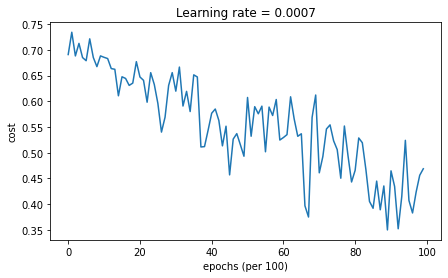

Accuracy: 79.67%


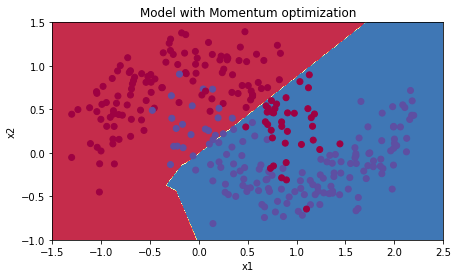

In [21]:
## train 3-layer model
layers_dims = [train_X.shape[0], 5, 2, 1]
parameters = model(train_X, train_Y, layers_dims, beta = 0.9, optimizer = "momentum")

## Predict
predictions = predict(train_X, train_Y, parameters)

plt.title("Model with Momentum optimization")
axes = plt.gca()
axes.set_xlim([-1.5,2.5])
axes.set_ylim([-1,1.5])
plot_decision_boundary(lambda x: predict_dec(parameters, x.T), train_X, train_Y)

###  Mini-batch with Adam mode

Cost after epoch 0 0.6906
Cost after epoch 1000 0.1856
Cost after epoch 2000 0.1509
Cost after epoch 3000 0.07445
Cost after epoch 4000 0.1259
Cost after epoch 5000 0.1042
Cost after epoch 6000 0.1006
Cost after epoch 7000 0.0316
Cost after epoch 8000 0.1117
Cost after epoch 9000 0.1976


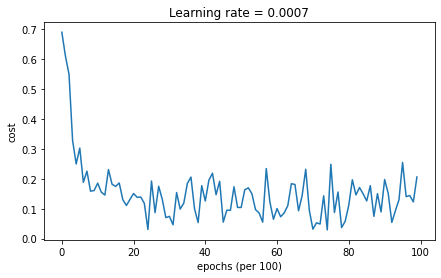

Accuracy: 94.00%


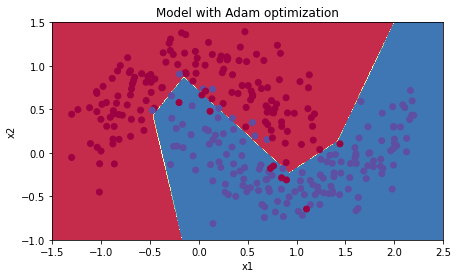

In [22]:
## train 3-layer model
layers_dims = [train_X.shape[0], 5, 2, 1]
parameters = model(train_X, train_Y, layers_dims, optimizer = "adam")

## Predict
predictions = predict(train_X, train_Y, parameters)

plt.title("Model with Adam optimization")
axes = plt.gca()
axes.set_xlim([-1.5,2.5])
axes.set_ylim([-1,1.5])
plot_decision_boundary(lambda x: predict_dec(parameters, x.T), train_X, train_Y)

###  Выводы

<table> 
    <tr>
        <td>
        optimization method
        </td>
        <td>
        accuracy
        </td>
        <td>
        cost shape
        </td>
    </tr>
        <td>
        Gradient descent
        </td>
        <td>
        79.7%
        </td>
        <td>
        oscillations
        </td>
    <tr>
        <td>
        Momentum
        </td>
        <td>
        79.7%
        </td>
        <td>
        oscillations
        </td>
    </tr>
    <tr>
        <td>
        Adam
        </td>
        <td>
        94%
        </td>
        <td>
        smoother
        </td>
    </tr>
</table> 

Импульс обычно помогает, но, учитывая небольшую скорость обучения и упрощенный набор данных, его влияние почти ничтожно. Кроме того, огромные колебания, которые вы видите в стоимости, происходят из-за того, что некоторые мини-пакеты являются более сложными, чем другие для алгоритма оптимизации.

Адам, с другой стороны, явно превосходит мини-пакетный градиентный спуск и импульс. Если вы запустите модель для большего количества эпох на этом простом наборе данных, все три метода приведут к очень хорошим результатам. Однако вы видели, что Адам сходится гораздо быстрее.

Некоторые преимущества Адама включают в себя:
- Относительно низкие требования к памяти (хотя и выше, чем градиентный спуск и градиентный спуск с импульсом)
- Обычно хорошо работает даже при небольшой настройке гиперпараметров (кроме $\alpha$)

- Adam paper: https://arxiv.org/pdf/1412.6980.pdf